# Machine learning

Machine learning is a subfield of artificial intelligence (AI).
Direct interpretation can be "teach machine to learn from the data".
Fundamentally, machine learning is building models of data by algorithms.
The machine learning algorithm can 'train' the model to learn from the data by tuning its parameters. 
Once the model have complished learning from data, they can be used to predict and understand aspects of newly observed data.


## Supervised learning

Supervised learning is modeling the relationship between measured features and their corresponding labels of the data; once this model is built, it can be used to label the unknown data.

**Classification** -- the labels are discrete categories.<br>
**Regression** -- the labels are continuous quantities.

### Example of classification

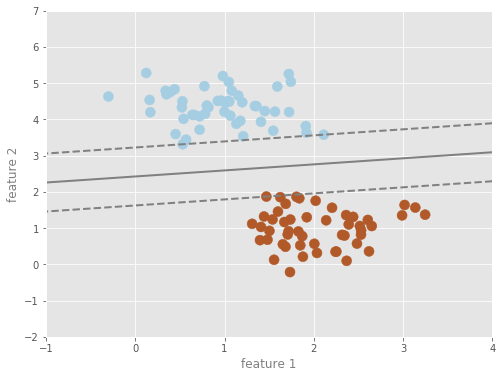

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# create 100 points into two groups
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.50)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=100)
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=2)
ax.set_xlabel('feature 1', color='gray')
ax.set_ylabel('feature 2', color='gray')
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

### Example of regression

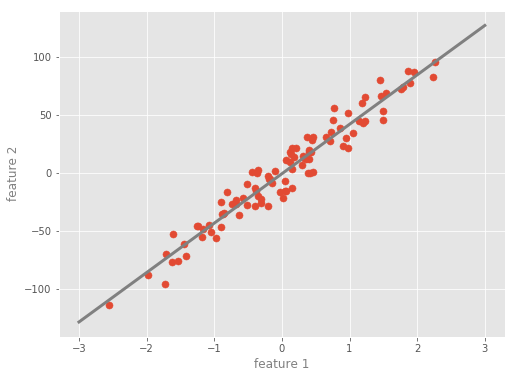

In [62]:
from sklearn import linear_model, datasets

# create data points
X, y, coef = datasets.make_regression(n_samples=100, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# fit the support vector classifier model
reg = linear_model.LinearRegression()
reg.fit(X, y)

line_X = np.arange(-3, 4)
line_y = reg.predict(line_X[:, np.newaxis])

fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)

ax.scatter(X, y, **point_style)
ax.plot(line_X, line_y, color='gray', lw=3)
ax.set_xlabel('feature 1', color='gray')
ax.set_ylabel('feature 2', color='gray')

## Unsupervised learning
Unsupervised learning is modeling the features without labels of the dataset, discribing the hidden structure of these unlabeled data. 

**Clustering** -- identify distinct groups of data.<br>
**Dimensionality reduction** -- search for less number of representations of the data.

### Example of clustering

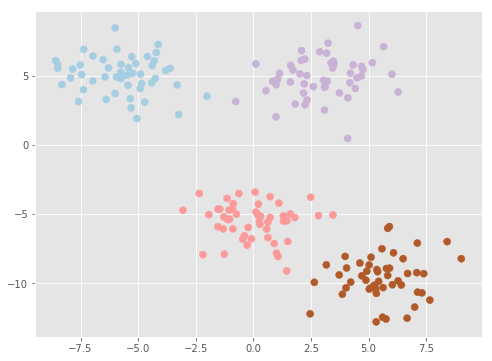

In [66]:
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=200, centers=4,
                  random_state=10, cluster_std=1.5)

# Fit the K Means model
clt = KMeans(4, random_state=0)
y = clt.fit_predict(X)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='Paired')

### Example of dimensionality reduction

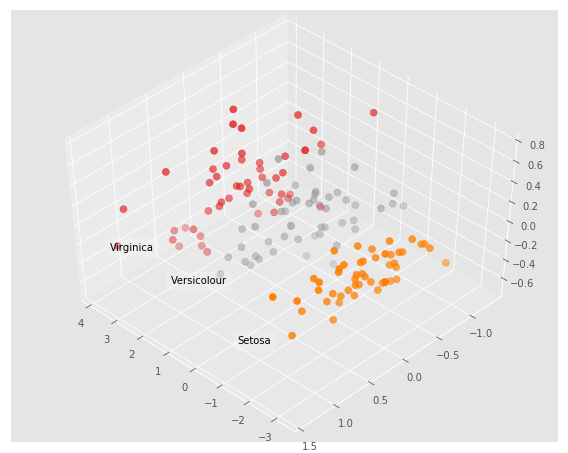

In [87]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean()+1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
point_style = dict(cmap='Set1', s=50)
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, **point_style)


References:
 - [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)
 - [Scikit-learn](http://scikit-learn.org/stable/index.html) 